In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
df=pd.read_csv("C:\\Users\\ACER\\Documents\\My Code\\GitHub\\tugasai.csv")
df=df.sample(frac=1,random_state=3)
df

,aspiration,doornumber,enginelocation,cylindernumber,enginesize,horsepower,highwaympg,price
189,0,2,0,4,90,68,38,6377.0
183,0,2,0,4,92,68,38,6669.0
118,1,4,0,4,110,116,30,9279.0
165,0,2,0,4,97,69,37,7299.0
160,0,2,0,4,108,73,31,7603.0
...,...,...,...,...,...,...,...,...
0,0,2,0,8,304,184,16,45400.0
184,0,2,0,4,97,69,37,6649.0
131,0,4,0,4,92,62,32,8778.0
152,0,2,0,4,97,69,37,7799.0


0    167
1     37
Name: aspiration, dtype: int64


<AxesSubplot:>

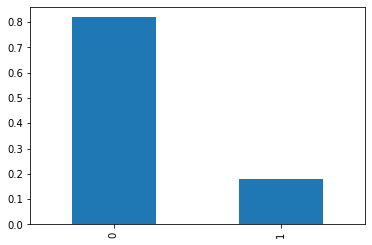

In [166]:
print(df['aspiration'].value_counts())
df['aspiration'].value_counts(normalize=True).plot(kind='bar')

In [167]:
df=df.fillna(method='ffill')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 189 to 106
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      204 non-null    int64  
 1   doornumber      204 non-null    int64  
 2   enginelocation  204 non-null    int64  
 3   cylindernumber  204 non-null    int64  
 4   enginesize      204 non-null    int64  
 5   horsepower      204 non-null    int64  
 6   highwaympg      204 non-null    int64  
 7   price           204 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 14.3 KB


In [169]:
y=df['aspiration']

In [170]:
x=df.drop('aspiration',axis=1)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, df.aspiration, test_size=0.30, random_state=4)

In [208]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='liblinear')

In [209]:
model.fit(X_train.values, y_train)

LogisticRegression(solver='liblinear')

In [210]:
#predict 1 menggunakan salah satu data mesin reguler
x_contohReg = np.array([2,0,8,304,184,16,45400]).reshape(1,-1)
y_contohReg = model.predict(x_contohReg)

In [246]:
#predict 2 menggunakan salah satu data mesin turbo
x_contohTurbo = np.array([4,0,6,145,106,27,48520]).reshape(1,-1)
y_contohTurbo = model.predict(x_contohTurbo)

In [249]:
#fungsi mengecek mesin
def engine(aspiration):
    if(aspiration == [0]):
        return "Mobil menggunakan Engine Standard"
    else:
        return "Mobil menggunakan Engine Turbo"

In [250]:
#mengecek hasil reguler turbo pada fungsi
engine(y_contohReg)

'Mobil menggunakan Engine Standard'

In [251]:
#mengecek hasil engine turbo pada fungsi
engine(y_contohTurbo)

'Mobil menggunakan Engine Turbo'

In [252]:
#presentase lebih mengarah ke engine reguler pada hasil kiri
print(model.predict_proba(x_contohReg))

[[0.84018516 0.15981484]]


In [253]:
#presentase lebih mengarah ke engine turbo pada hasil kanan
print(model.predict_proba(x_contohTurbo))

[[0.48880403 0.51119597]]


In [260]:
#tabel atribut dari data sebagai parameter prediksi result machine learning
X_test

,doornumber,enginelocation,cylindernumber,enginesize,horsepower,highwaympg,price
183,2,0,4,92,68,38,6669.0
9,2,1,6,194,207,25,34028.0
59,2,0,2,80,135,23,15645.0
45,4,0,4,152,95,33,16900.0
5,2,0,12,326,262,17,36000.0
...,...,...,...,...,...,...,...
94,2,0,4,146,116,30,11199.0
84,4,0,4,121,110,28,12170.0
101,2,0,4,110,100,31,10345.0
54,2,0,4,108,101,29,16430.0


In [271]:
#tabel result dari data asli
y_test

183    0
9      0
59     0
45     1
5      0
      ..
94     0
84     0
101    0
54     0
61     0
Name: aspiration, Length: 62, dtype: int64

In [262]:
#persentase ketepatan value result predict dengan value result asli data
model.score(X_test.values,y_test)

0.7419354838709677

In [268]:
#value hasil predict Machine learning
model.predict(X_test.values)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [270]:
#value result asli dari engine pada data
y_test.values

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)